<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue"></span> Cluster Analysis</h1>
<hr>

Welcome to <span style="color:royalblue">Cluster Analysis</span>!

At last, it's time to build our clustering models!


For clustering problems, the chosen input features are usually more important than which algorithm you use.
* In this module, we'll apply the K-Means algorithm to 3 different feature sets.
* There are no clear, widely-accepted performance metrics for clusters because there're no "ground truth" labels.
* Even so, we can compare the different clusters created from the 3 different feature sets.

<br><hr id="toc">

### In this module...

In this module, we'll cover:
1. [K-Means](#k-means)
2. [Base features](#base)
3. [Threshold features](#threshold)
4. [PCA features](#pca)
5. [Model comparison](#comparison)


<br><hr>

### First, let's import libraries and load the datasets.

First, import libraries that you'll need.

In [1]:
# print_function for compatibility with Python 3
from __future__ import print_function

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn's make_pipeline function
from sklearn.pipeline import make_pipeline

# Scikit-Learn's StandardScaler
from sklearn.preprocessing import StandardScaler

# Scikit-Learn's KMeans algorithm (added later)
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import pairwise_distances

**Next, let's import 3 CSV files we've saved throughout this project.**
* Let's import <code style="color:crimson">'analytical_base_table.csv'</code> (created in Module 1) as <code style="color:steelblue">base_df</code>. 
* Let's import <code style="color:crimson">'threshold_item_data.csv'</code> (created in Module 2) as <code style="color:steelblue">threshold_item_data</code>. 
* Let's import <code style="color:crimson">'pca_item_data.csv'</code> (created in Module 3) as <code style="color:steelblue">pca_item_data</code>. 
* Set <code style="color:steelblue">index_col=0</code> for each one to use CustomerID as the index.

In [2]:
# Import analytical base table
base_df = pd.read_csv('analytical_base_table.csv', index_col=0)

# Import thresholded item features
threshold_item_data = pd.read_csv('threshold_item_data.csv', index_col=0)

# Import PCA item features
pca_item_data = pd.read_csv('pca_item_data.csv', index_col=0)

**Print the shape of each one to make sure we're on the same page.**

In [3]:
# Print shape of each dataframe
print(base_df.shape)
print(threshold_item_data.shape)
print(pca_item_data.shape)

(414, 8)
(414, 20)
(414, 125)


<span id="k-means"></span>
# 1. K-Means

For clustering, which algorithm you choose is typically less important than the **input features** that you feed into it. 

<br>
**We already have a <code style="color:steelblue">base_df</code>.** 

**Create a <code style="color:steelblue">threshold_df</code> by joining it with <code style="color:steelblue">threshold_item_data</code>.**
* Then, display the first 5 rows of the new dataframe.

In [4]:
# Join base_df with threshold_item_data
threshold_df = base_df.join(threshold_item_data)

# Display first 5 rows of threshold_df
threshold_df.head(5)

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,...,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,...,0,0,0,0,5,0,0,4,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,...,0,0,0,0,0,1,1,1,1,1
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,...,0,1,0,0,0,0,0,0,0,1
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,...,0,0,0,0,1,0,0,2,0,5


**Create a <code style="color:steelblue">pca_df</code> by joining <code style="color:steelblue">base_df</code> with <code style="color:steelblue">pca_item_data</code>.**
* Then, display the first 5 rows of the new dataframe.

In [5]:
# Join base_df with pca_item_data
pca_df = base_df.join(pca_item_data)

# Display first 5 rows of pca_df
pca_df.head(5)

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,...,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828892,...,-0.007766,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219839,1.226195,...,-1.904435,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260838,2.387828,...,4.595645,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929319,-0.714874,...,-1.869817,-0.460085,-1.192275,-0.596812,-0.808693,0.373854,-0.282510,-0.819361,-1.010051,0.363232
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,-2.053129,2.110788,...,1.695937,8.096258,10.325739,-8.947321,-3.582689,-2.078227,3.346192,5.183793,0.928319,-1.933235


**Before moving on, add this import to your library imports above. Then, re-run that code cell.**

<pre style="color:steelblue">
from sklearn.cluster import KMeans
</pre>

<span id="base"></span>
# 2. Base DF

The first set of features we'll consider is **"Base DF"**. 
* This only includes the purchase pattern features from our analytical base table.

<br>
**First, display the first 5 observations from <code style="color:steelblue">base_df</code> just as reminder.**

In [6]:
# First 5 observations of base_df
base_df.head(5)

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


**Let's initialize a model pipeline for K-Means.**
* Note that we can control the number of clusters using <code style="color:steelblue">n_clusters=3</code>. This is the hyperparameter $k$.
* We also set <code style="color:steelblue">random_state=123</code> for replicable results. 

In [31]:
# K-Means model pipeline
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=5, random_state=123))

**Once we have the pipeline, fitting the model is just 1 line of code.**

In [32]:
# Fit K-Means pipeline
kmeans.fit(base_df)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=5, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=123,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [33]:
# The Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, 
# where a lower Davies-Bouldin index relates to a model with better separation between the clusters.
print('Davies-Bouldin index: {}'.format(metrics.davies_bouldin_score(base_df, kmeans.predict(base_df))))
# The higher Calinski-Harabaz score relates to a model with better defined clusters.
print('Calinski-Harabaz score: {}'.format(metrics.calinski_harabaz_score(base_df, kmeans.predict(base_df))))
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
print("Silhouette Coefficient: {}".format(metrics.silhouette_score(base_df, kmeans.predict(base_df))))

Davies-Bouldin index: 1.009410277220395
Calinski-Harabaz score: 227.3632846699049
Silhouette Coefficient: 0.42300218421422353


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


**Let's save the clusters to our dataframe.**

In [34]:
# Save clusters to base_df
base_df['cluster'] = kmeans.predict(base_df)

# Display first 5 rows of base_df
base_df.head(5)

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,4
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,3
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,3


**To visualize these clusters, we can plot a scatterplot and color the points by cluster.**
* Since it's impossible to visualize all of the features, we'll just pick 2.
* We use the <code style="color:steelblue">hue=</code> argument to color by cluster.

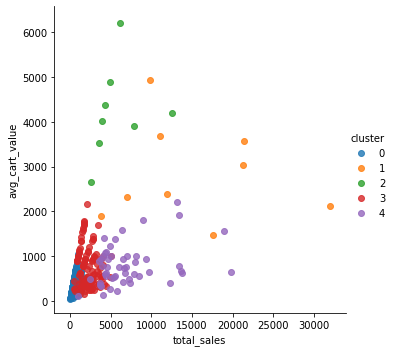

In [37]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales',y = 'avg_cart_value', data=base_df, hue='cluster', fit_reg=False)
plt.show()

<span id="threshold"></span>
# 3. Threshold DF

The second set of features we'll consider is **"Threshold DF"**. 
* This includes the purchase pattern features from our analytical base table.
* This also includes the purchase counts for the 20 most popular items.

We'll repeat the same steps as above.

<br>
**First, initialize a new model pipeline for K-Means.**
* Set it to create 3 clusters.
* Also set <code style="color:steelblue">random_state=123</code> for replicable results. 

In [38]:
# K-Means model pipeline
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=5, random_state=123))

**Next, fit the K-Means model pipeline to <code style="color:steelblue">threshold_df</code>.**

In [39]:
# Fit K-Means pipeline
kmeans.fit(threshold_df)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=5, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=123,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [40]:
# The Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, 
# where a lower Davies-Bouldin index relates to a model with better separation between the clusters.
print('Davies-Bouldin index: {}'.format(metrics.davies_bouldin_score(threshold_df, kmeans.predict(threshold_df))))
# The higher Calinski-Harabaz score relates to a model with better defined clusters.
print('Calinski-Harabaz score: {}'.format(metrics.calinski_harabaz_score(threshold_df, kmeans.predict(threshold_df))))
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
print("Silhouette Coefficient: {}".format(metrics.silhouette_score(threshold_df, kmeans.predict(threshold_df))))

Davies-Bouldin index: 1.4340681321489028
Calinski-Harabaz score: 156.84928515535532
Silhouette Coefficient: 0.4356463352461381


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


**Save the clusters to <code style="color:steelblue">threshold_df</code>.**

In [41]:
# Save clusters to threshold_df
threshold_df['cluster'] = kmeans.predict(threshold_df)

# Display first 5 rows of threshold_df
threshold_df.head(5)

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,...,22551,22629,22328,21731,22556,22554,22423,22326,POST,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,...,0,0,0,5,0,0,4,0,0,3
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,...,0,0,0,0,0,0,0,0,4,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,...,0,0,0,0,1,1,1,1,1,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,...,1,0,0,0,0,0,0,0,1,0
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,...,0,0,0,1,0,0,2,0,5,0


If you scroll to the right, you'll see the assigned clusters.

<br>
**To visualize these clusters, plot a scatterplot and color the points by cluster.**
* Use the same 2 features as in the scatterplot above so that you can visually contrast the plots.
* Use the <code style="color:steelblue">hue=</code> argument to color by cluster.

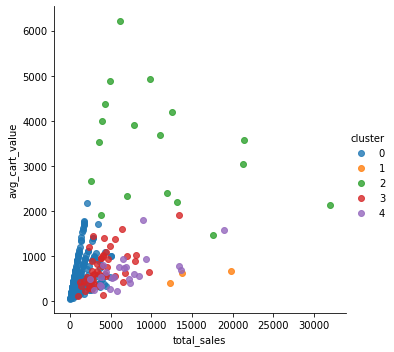

In [42]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales',y = 'avg_cart_value', data=threshold_df, hue='cluster', fit_reg=False)
plt.show()

<span id="pca"></span>
# 4. PCA DF

The last set of features we'll consider is **"PCA DF"**. 
* This includes the purchase pattern features from our analytical base table.
* This also includes the first 125 principal component features from the item data.

We'll repeat the same steps as above.

<br>

**First, initialize a new model pipeline for K-Means.**
* Set it to create 3 clusters.
* Also set <code style="color:steelblue">random_state=123</code> for replicable results. 

In [21]:
# K-Means model pipeline
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

**Next, fit the K-Means model pipeline to <code style="color:steelblue">pca_df</code>.**

In [22]:
# Fit K-Means pipeline
kmeans.fit(pca_df)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=123,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [23]:
# The Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, 
# where a lower Davies-Bouldin index relates to a model with better separation between the clusters.
print('Davies-Bouldin index: {}'.format(metrics.davies_bouldin_score(pca_df, kmeans.predict(pca_df))))
# The higher Calinski-Harabaz score relates to a model with better defined clusters.
print('Calinski-Harabaz score: {}'.format(metrics.calinski_harabaz_score(pca_df, kmeans.predict(pca_df))))
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
print("Silhouette Coefficient: {}".format(metrics.silhouette_score(pca_df, kmeans.predict(pca_df))))

Davies-Bouldin index: 0.12407129474849
Calinski-Harabaz score: 28.189549555737635
Silhouette Coefficient: 0.7948805880421851


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


**Save the clusters to <code style="color:steelblue">pca_df</code>.**

In [24]:
# Save clusters to pca_df
pca_df['cluster'] = kmeans.predict(pca_df)

# Display first 5 rows of pca_df
pca_df.head(5)

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,...,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828892,...,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219839,1.226195,...,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260838,2.387828,...,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929319,-0.714874,...,-0.460085,-1.192275,-0.596812,-0.808693,0.373854,-0.282510,-0.819361,-1.010051,0.363232,0
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,-2.053129,2.110788,...,8.096258,10.325739,-8.947321,-3.582689,-2.078227,3.346192,5.183793,0.928319,-1.933235,0


Again, if you scroll ALLLLLLL the way to the right, you'll see the assigned clusters.

<br>
**To visualize these clusters, plot a scatterplot and color the points by cluster.**
* Use the same 2 features as in the scatterplot above so that you can visually contrast the plots.
* Use the <code style="color:steelblue">hue=</code> argument to color by cluster.

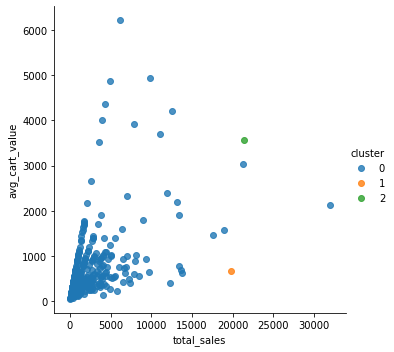

In [25]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales',y = 'avg_cart_value', data=pca_df, hue='cluster', fit_reg=False)
plt.show()

<span id="comparison"></span>
# 5. Model comparison

Each of those 3 dataframes have the same indices:

In [26]:
# Check all indices are identical
print(all(base_df.index == threshold_df.index))
print(all(base_df.index == pca_df.index))

True
True


**Let's import the adjusted Rand index from Scikit-Learn.**

"The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings." - From the scikit-learn API.

In [27]:
# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score

**We can see the adjusted Rand index between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">threshold_df.cluster</code> like so:**

In [28]:
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.6021354951782343

Furthermore, the adjusted Rand index is **symmetric**, which means you can pass in the clusters in any order.

In [29]:
# Similary between threshold_df.cluster and base_df.cluster
adjusted_rand_score(threshold_df.cluster, base_df.cluster)

0.6021354951782343

**Finally, display the adjusted Rand index between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">pca_df.cluster</code>.**
* Is it higher or lower than the one between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">threshold_df.cluster</code>?
* Which clusters are more like the ones created from the the base dataframe?

In [30]:
# Similary between base_df.cluster and pca_df.cluster
adjusted_rand_score(base_df.cluster, pca_df.cluster)

0.042311307744307906